In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ceph fs
# r_s3.to_csv("r_s3.csv")
# r_scratch.to_csv("r_scratch.csv")
r_s3 = pd.read_csv("r_s3.csv")
r_scratch = pd.read_csv("r_scratch.csv")

In [3]:
r_s3

,Unnamed: 0,runtime,gpu_util_zero,gpu_util_mean_no_zeros,mem_util_mean,mem_util_mean_no_zeros,implementation,cache,library,fig,throughput,dl_MB,imgs,Mbit/s,MB/s
0,0,126.960746,26.428571,40.320388,12.171429,23.666667,threaded,1,torch,Figure(2160x1800),236.293508,2747.840590,30000,173.145838,21.643230
1,1,183.615882,20.714286,40.099099,5.857143,11.081081,threaded,1,lightning,Figure(2160x1800),163.384560,2727.647472,30000,118.841462,14.855183
2,2,160.027627,23.664122,52.110000,9.000000,16.605634,asyncio,1,torch,Figure(2160x1800),187.467630,3110.652332,30000,155.505766,19.438221
3,3,215.978976,14.124294,53.046053,6.316384,9.474576,asyncio,1,lightning,Figure(2160x1800),138.902409,3110.652332,30000,115.220561,14.402570
4,4,521.923182,19.392523,58.133333,3.841121,12.000000,vanilla,1,torch,Figure(2160x1800),57.479723,3110.652332,30000,47.679849,5.959981
5,5,2989.419263,90.495450,41.640957,0.438069,7.502165,vanilla,1,lightning,Figure(2160x1800),10.035394,3110.652332,30000,8.324432,1.040554


In [4]:
font_size=30
params = {'legend.fontsize': font_size,
          'figure.figsize': (20, 15),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size}

(0.0, 600.0)

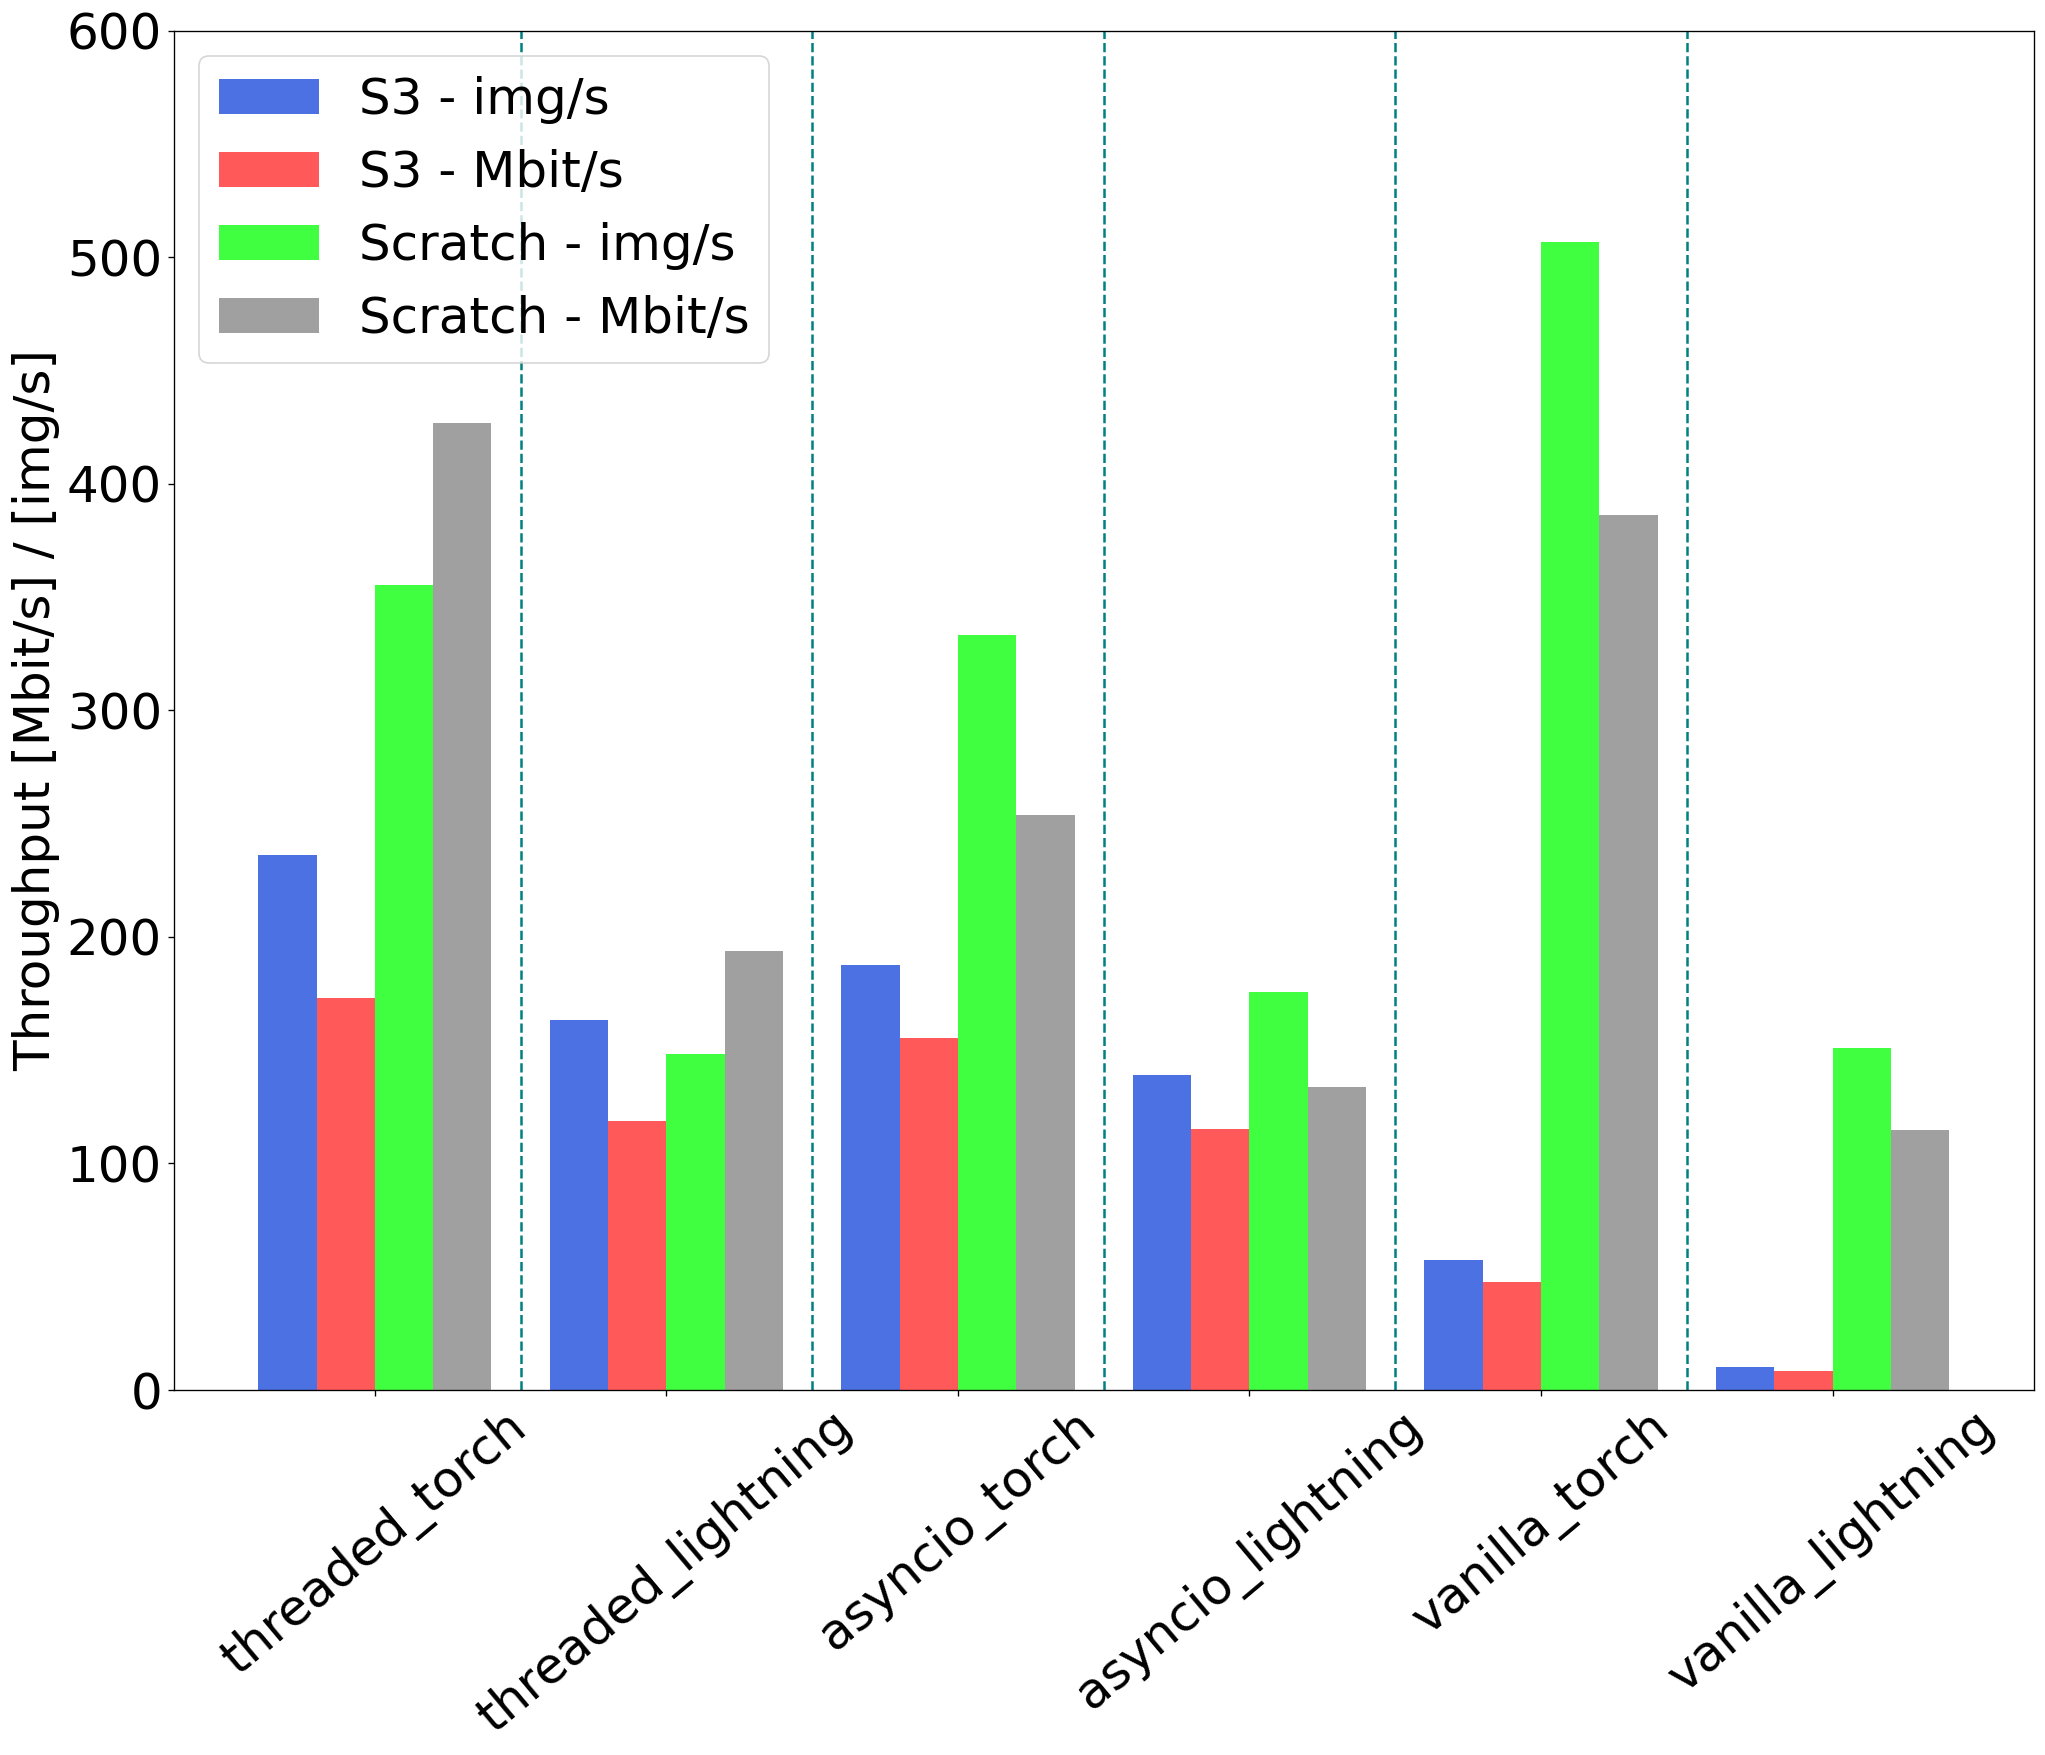

In [8]:
plt.rcParams.update(params)
fig, ax = plt.subplots(dpi=120)
offset = 0
width = 0.2
x_labels = []


for i in range(6):
    tp_img = r_s3.iloc[i][10]
    tp_mbit= r_s3.iloc[i][13]
    label = f"{r_s3.iloc[i][6]}_{r_s3.iloc[i][8]}"
    x_labels.append(label)
    ax.bar(height=tp_img, x=i-0.3, width=width, align='center', alpha=0.95, ecolor='black', capsize=5,
           label=label, color="royalblue")
    ax.bar(height=tp_mbit, x=i-0.1, width=width, align='center', alpha=0.65, ecolor='black', capsize=5,
           label=label, color="red")

    tp_img = r_scratch.iloc[i][10]
    tp_mbit= r_scratch.iloc[i][13]
    label = f"{r_scratch.iloc[i][6]}_{r_scratch.iloc[i][8]}"
    ax.bar(height=tp_img, x=i+0.1, width=width, align='center', alpha=0.75, ecolor='black', capsize=5,
           label=label, color="lime")
    ax.bar(height=tp_mbit, x=i+0.3, width=width, align='center', alpha=0.75, ecolor='black', capsize=5,
           label=label, color="gray") 

ax.set_xticks(np.arange(len(x_labels)), x_labels, rotation="40")
ax.legend(["S3 - img/s", "S3 - Mbit/s", "Scratch - img/s", "Scratch - Mbit/s"])
ax.set_ylabel("Throughput [Mbit/s] / [img/s]")

for i in range(5):
    plt.axvline(x=i+0.5, color="teal", linestyle="--", linewidth=1.5)

ax.set_ylim([0, 600])


In [6]:
fig.savefig(f"parallel-fetch-throughput.pdf", bbox_inches='tight')